In [22]:
import requests
import csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Set up your NewsAPI key
api_key = 'ddb500fc7bc64e369f862dbffe32b405'

# Define the list of stock symbols and corresponding company names
stock_info = {
    'AAPL': 'Apple',
    'GOOGL': 'Alphabet',
    'AXON': 'Axon Enterprise',
    'BA': 'Boeing',
    'GD': 'General Dynamics',
    'NEM': 'Newmont Goldcorp',
    'FNV': 'Franco-Nevada',
    'GOLD': 'Barrick Gold',
    'BAC': 'Bank of America',
    'JPM': 'JPMorgan Chase',
    'BMO': 'Bank of Montreal',
    'GS': 'Goldman Sachs',
    'MS': 'Morgan Stanley',
    'SCHW': 'Charles Schwab',
    'NVO': 'Novo Nordisk',
    'REGN': 'Regeneron Pharmaceuticals',
    'VRTX': 'Vertex Pharmaceuticals',
    'ANET': 'Arista Networks',
    'DELL': 'Dell Technologies',
    'HP': 'HP Inc.',
    'IAU': 'iShares Gold Trust',
    'URE': 'ProShares Ultra Real Estate',
    'ELD': 'WisdomTree Emerging Markets Local Debt',
    'SSD': 'Simpson Manufacturing',
    'UFPI': 'Universal Forest Products',
    'WFG': 'West Fraser Timber',
    'BKNG': 'Booking Holdings',
    'TNL': 'Travel + Leisure',
    'RCL': 'Royal Caribbean Cruises',
    'NVDA': 'NVIDIA',
    'TSM': 'Taiwan Semiconductor Manufacturing',
    'AVGO': 'Broadcom'
}

# Define the API endpoint
endpoint = 'https://newsapi.org/v2/everything'

# Create a list to store English articles with symbols and sentiment scores
articles_with_sentiment = []

# Initialize sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Iterate through each stock symbol
for stock_symbol, stock_name in stock_info.items():
    params = {
        'q': stock_name,
        'language': 'en',
        'apiKey': api_key
    }

    # Make the API request
    response = requests.get(endpoint, params=params)
    data = response.json()

    # Check if the response has 'articles' key
    if 'articles' in data:
        articles = data['articles']

        # Process and add articles to the list
        for article in articles:
            if article['description'] is not None:  # Check for None description
                # Calculate sentiment score using VADER
                sentiment_scores = sid.polarity_scores(article['description'])
                sentiment = sentiment_scores['compound']

                # Append article data to the list
                articles_with_sentiment.append({
                        'Stock Name': stock_name,
                        'Sentiment': sentiment,
                        'Publishing Date': article['publishedAt'],
                        'Description': article['description']
                    })
    
# Create a DataFrame from the collected data
df = pd.DataFrame(articles_with_sentiment)

# Encode stock symbols into numerical labels
df['Sentiment'] = df['Sentiment'].astype(float)  # Ensure sentiment values are float

In [23]:
df.to_csv('data_pull2_0802.csv', index=False)

In [24]:
len(df['Stock Name'].unique())

32

In [25]:
df.groupby('Stock Name').mean()['Sentiment']

Stock Name
Alphabet                                  0.254535
Apple                                     0.266237
Arista Networks                           0.306775
Axon Enterprise                           0.302639
Bank of America                           0.061456
Bank of Montreal                          0.154227
Barrick Gold                              0.304206
Boeing                                    0.130618
Booking Holdings                          0.223077
Broadcom                                  0.300684
Charles Schwab                            0.180073
Dell Technologies                         0.348816
Franco-Nevada                             0.277600
General Dynamics                          0.220800
Goldman Sachs                             0.055744
HP Inc.                                   0.234636
JPMorgan Chase                            0.046795
Morgan Stanley                            0.258057
NVIDIA                                    0.218996
Newmont Goldcorp    

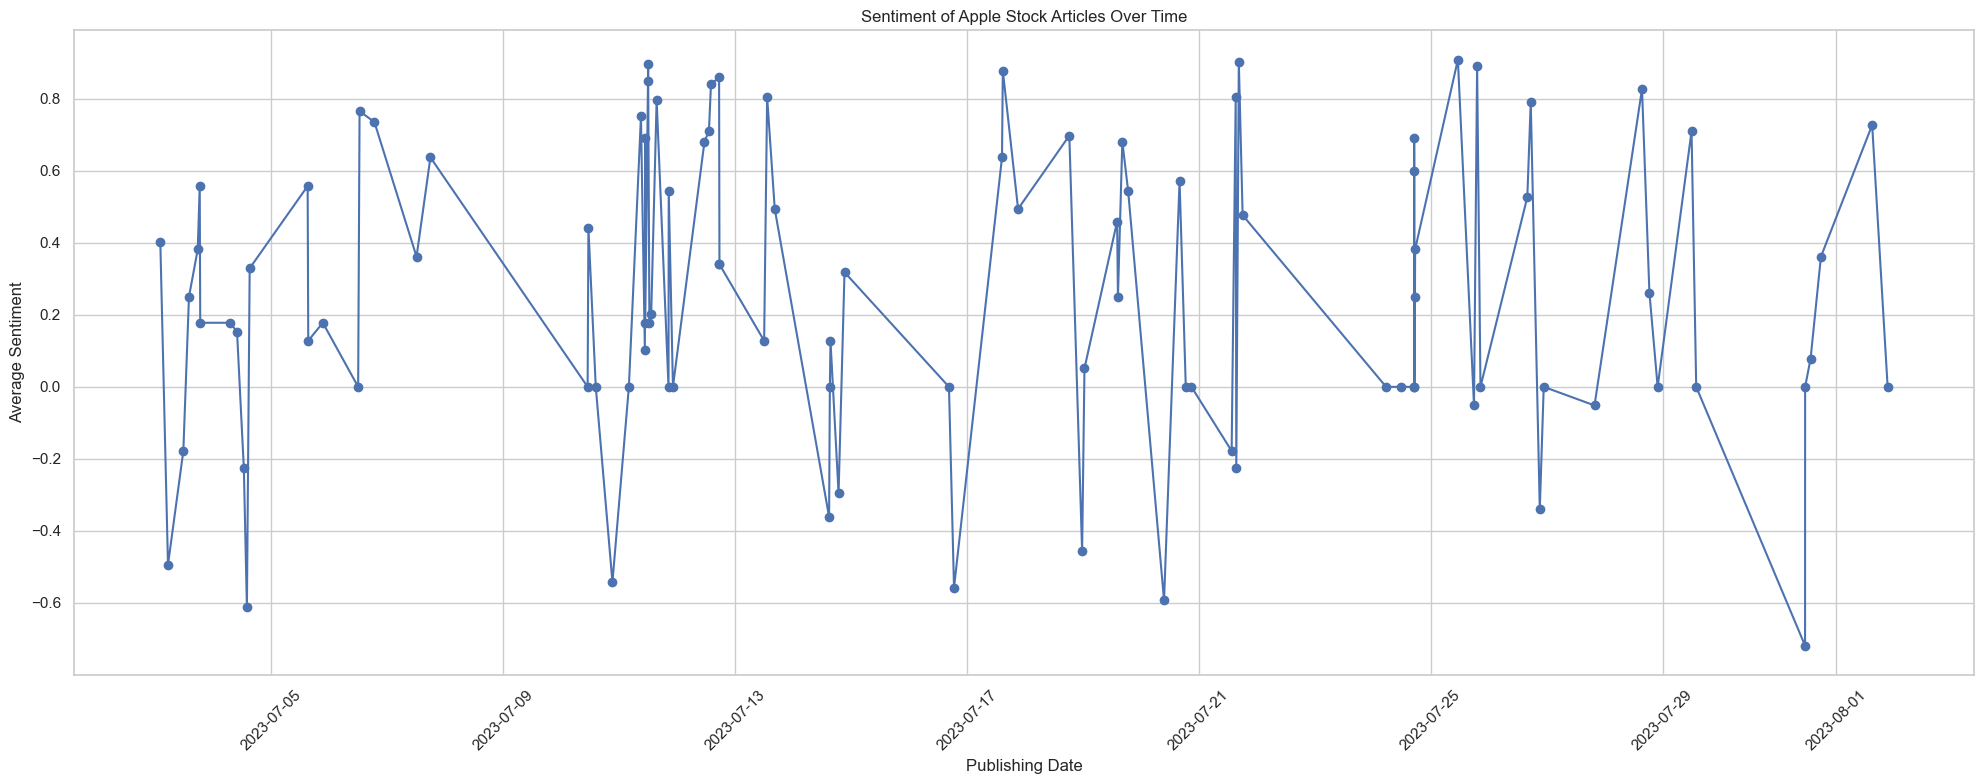

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'Publishing Date' column to datetime format
df['Publishing Date'] = pd.to_datetime(df['Publishing Date'])

# Filter the DataFrame for articles related to Apple (AAPL)
apple_df = df[df['Stock Name'] == 'Apple']

# Group data by publishing date and calculate average sentiment
grouped_apple_df = apple_df.groupby('Publishing Date')['Sentiment'].mean().reset_index()

# Set the style of seaborn for better visualization
sns.set(style="whitegrid")

# Create a line plot for sentiment over time
plt.figure(figsize=(20, 8))
plt.plot(grouped_apple_df['Publishing Date'], grouped_apple_df['Sentiment'], marker='o')
plt.title('Sentiment of Apple Stock Articles Over Time')
plt.xlabel('Publishing Date')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot as an image
plt.savefig('apple_sentiment_over_time.png')

# Show the plot
plt.show()